In [ ]:
import sys
import os
import skimage
# Adiciona o caminho à lista de diretórios de busca do Python (sys.path)
# sys.path.append('/home/niko/project/pibic_cch_maskRCNN_test')

from cch_dataSet import CchDataset

# we define a prediction configuration 
from numpy import expand_dims, mean
from mrcnn.model import mold_image
from mrcnn.utils import compute_ap
from cch_dataSet import CchDataset
from mrcnn.model import load_image_gt
from mrcnn.model import MaskRCNN
from mrcnn import visualize

IMAGE_DIR = '/home/niko/project/pibic_cch_maskRCNN_test/dataset/images'
ANNOTATIONS_DIR =  '/home/niko/project/pibic_cch_maskRCNN_test/dataset/annotations'
# evaluate_model is used to calculate mean Average Precision of the model
def evaluate_model(dataset, model, cfg):
    APs = list()
    for image_id in dataset.image_ids:

        image, image_meta, gt_class_id, gt_bbox, gt_mask = load_image_gt(dataset, cfg, image_id, use_mini_mask=False)

        scaled_image = mold_image(image, cfg)

        sample = expand_dims(scaled_image, 0)

        yhat = model.detect(sample, verbose=0)

        r = yhat[0]

        AP, _, _, _ = compute_ap(gt_bbox, gt_class_id, gt_mask, r["rois"], r["class_ids"], r["scores"], r['masks'])

        APs.append(AP)
    maP = mean(APs)
    return maP


class_names = ['BG','Femea','Macho','Linfa']

dt = CchDataset()
(images, annotations, path_ids) = dt.prepare_dataset(IMAGE_DIR,ANNOTATIONS_DIR)

im1 = images[167]
im2 = images[149]
im3 = images[144]
im1 = skimage.io.imread(im1)
im2 = skimage.io.imread(im2)
im3 = skimage.io.imread(im3)

In [8]:
images[144]

'/home/niko/project/pibic_cch_maskRCNN_test/dataset/images/3d87257d-editada_180_B3.jpeg_quadrante_2_4.jpg'

<h1>teste #1 modelo A<h2>

In [ ]:
sys.path.append('/home/niko/project/pibic_cch_maskRCNN_test/variant-a')
from cch_config_variant_a import CchConfig
ROOT_A = '/home/niko/project/pibic_cch_maskRCNN_test/variant-a'
LOG = os.path.join(ROOT_A,'logs')
MODEL_A = os.path.join(ROOT_A,'model/cochonilha20230623T2347/mask_rcnn_cochonilha_0010.h5')

model = MaskRCNN(mode='inference', model_dir=LOG,config=CchConfig())
model.load_weights(MODEL_A, by_name=True)
results = model.detect([im1,im2,im3], verbose=1)

objetos detectados imagem 1: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], total: 56
objetos detectados imagem 2: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], total: 31
objetos detectados imagem 3: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], total: 35


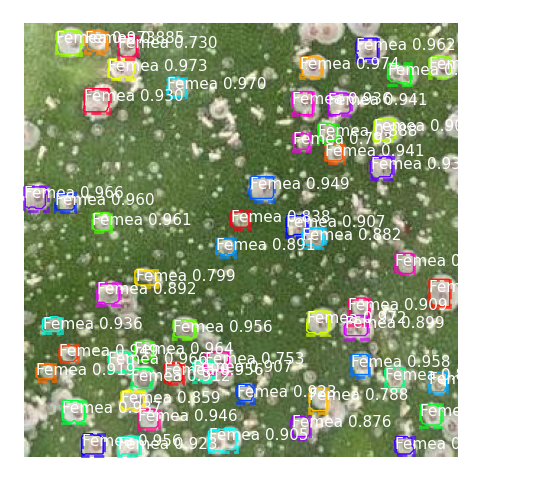

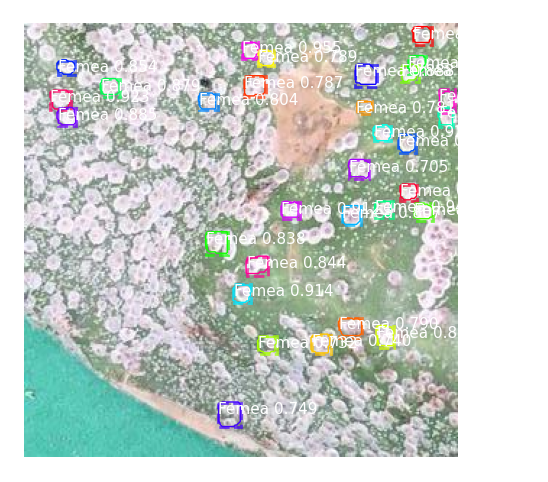

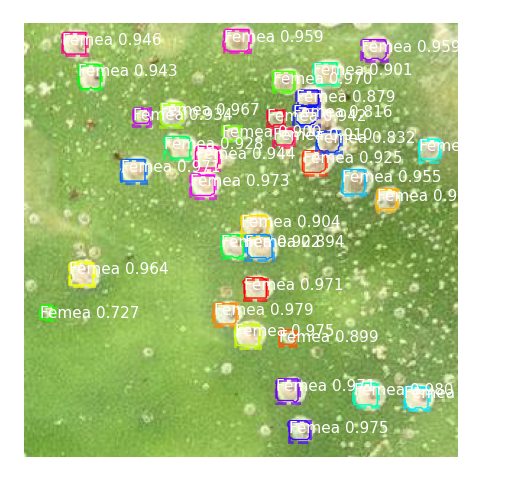

In [61]:
r = results[0]
r2 = results[1]
r3 = results[2]
print(f'objetos detectados imagem 1: { r["class_ids"] }, total: { len ( r["class_ids"] ) }')
print(f'objetos detectados imagem 2: { r2["class_ids"] }, total: { len ( r2["class_ids"] ) }')
print(f'objetos detectados imagem 3: { r3["class_ids"] }, total: { len ( r3["class_ids"] ) }')
visualize.display_instances(im1, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'],figsize=(6,6),show_mask=False)

visualize.display_instances(im2, r2['rois'], r2['masks'], r2['class_ids'], 
                            class_names, r2['scores'],figsize=(6,6),show_mask=False)

visualize.display_instances(im3, r3['rois'], r3['masks'], r3['class_ids'], 
                            class_names, r3['scores'],figsize=(6,6),show_mask=False)

<h1>teste #2 modelo B</h1>

In [ ]:
sys.path.append('/home/niko/project/pibic_cch_maskRCNN_test/variant-b')
from cch_config_variant_b import CchConfig
ROOT_B = '/home/niko/project/pibic_cch_maskRCNN_test/variant-b'
LOG = os.path.join(ROOT_B,'logs')
MODEL_B = os.path.join(ROOT_B,'model/cochonilha20230624T0124/mask_rcnn_cochonilha_0008.h5')

model = MaskRCNN(mode='inference', model_dir=LOG, config=CchConfig())
model.load_weights(MODEL_B, by_name=True)
results = model.detect([im1,im2,im3], verbose=1)

objetos detectados imagem 1: [1], total: 1
objetos detectados imagem 2: [3 1 1 1 1 1 1 1 3 1], total: 10
objetos detectados imagem 3: [1 1 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3], total: 37


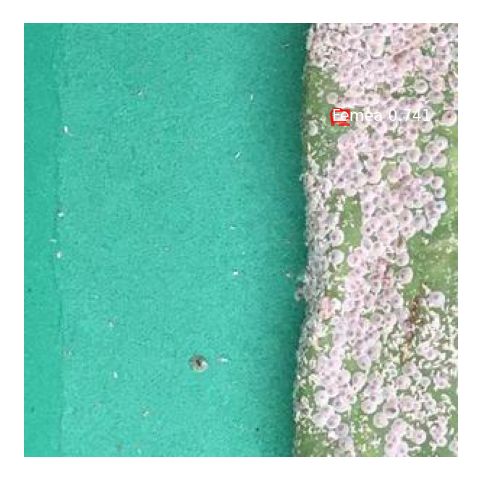

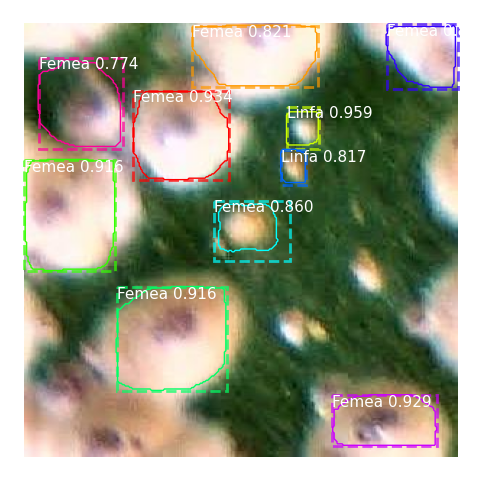

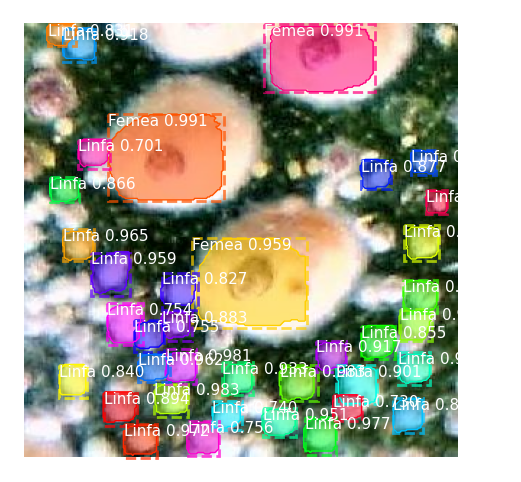

In [11]:
r = results[0]
r2 = results[1]
r3 = results[2]
print(f'objetos detectados imagem 1: { r["class_ids"] }, total: { len ( r["class_ids"] ) }')
print(f'objetos detectados imagem 2: { r2["class_ids"] }, total: { len ( r2["class_ids"] ) }')
print(f'objetos detectados imagem 3: { r3["class_ids"] }, total: { len ( r3["class_ids"] ) }')
visualize.display_instances(im1, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'],figsize=(6,6),show_mask=False)

visualize.display_instances(im2, r2['rois'], r2['masks'], r2['class_ids'], 
                            class_names, r2['scores'],figsize=(6,6),show_mask=False)

visualize.display_instances(im3, r3['rois'], r3['masks'], r3['class_ids'], 
                            class_names, r3['scores'],figsize=(6,6
                            ),show_mask=True)


<h1>teste #3 modelo B.beta</h1>

In [ ]:
sys.path.append('/home/niko/project/pibic_cch_maskRCNN_test/variant-b-sm-rpn-anc')
from cch_config_variant_b_sm_rpn_sm_rpn import CchConfig
ROOT_B = '/home/niko/project/pibic_cch_maskRCNN_test/variant-b-sm-rpn-anc'
LOG = os.path.join(ROOT_B,'logs')
MODEL_B = os.path.join(ROOT_B,'model/cochonilha20230624T0150/mask_rcnn_cochonilha_0005.h5')

model = MaskRCNN(mode='inference', model_dir=LOG, config=CchConfig())
model.load_weights(MODEL_B, by_name=True)
results = model.detect([im1,im2,im3], verbose=1)

objetos detectados imagem 1: [1], total: 1
objetos detectados imagem 2: [1 3 1 3 1 1 1 1 1], total: 9
objetos detectados imagem 3: [3 1 3 3 3 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3
 3 3], total: 39


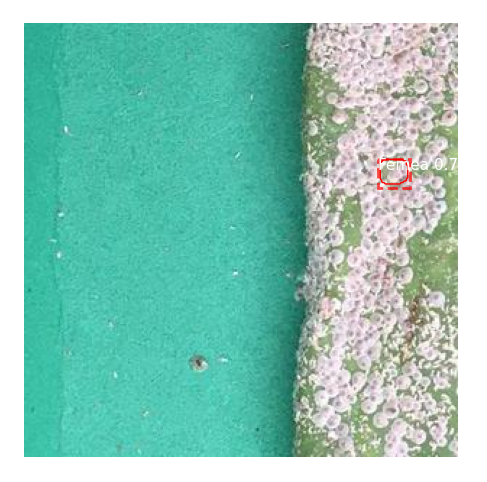

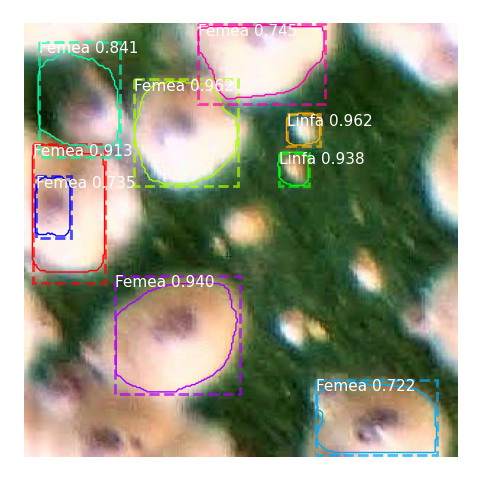

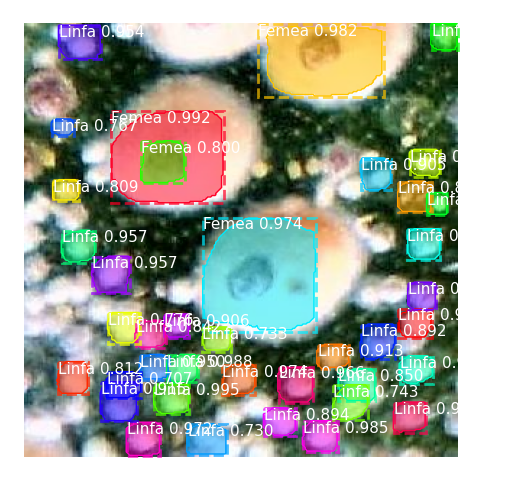

In [14]:
r = results[0]
r2 = results[1]
r3 = results[2]
print(f'objetos detectados imagem 1: { r["class_ids"] }, total: { len ( r["class_ids"] ) }')
print(f'objetos detectados imagem 2: { r2["class_ids"] }, total: { len ( r2["class_ids"] ) }')
print(f'objetos detectados imagem 3: { r3["class_ids"] }, total: { len ( r3["class_ids"] ) }')
visualize.display_instances(im1, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'],figsize=(6,6),show_mask=False)

visualize.display_instances(im2, r2['rois'], r2['masks'], r2['class_ids'], 
                            class_names, r2['scores'],figsize=(6,6),show_mask=False)

visualize.display_instances(im3, r3['rois'], r3['masks'], r3['class_ids'], 
                            class_names, r3['scores'],figsize=(6,6
                            ),show_mask=True)


<h1>
teste #4 modelo C
</h2>

In [ ]:
sys.path.append('/home/niko/project/pibic_cch_maskRCNN_test/variant-c')
from cch_config_variant_c import CchConfig
ROOT_C = '/home/niko/project/pibic_cch_maskRCNN_test/variant-c'
LOG = os.path.join(ROOT_C,'logs')
MODEL_C = os.path.join(ROOT_C,'model/cochonilha20230624T1314/mask_rcnn_cochonilha_0008.h5')

model = MaskRCNN(mode='inference', model_dir=LOG, config=CchConfig())
model.load_weights(MODEL_B, by_name=True)
results = model.detect([im1,im2,im3], verbose=1)

objetos detectados imagem 1: [1], total: 1
objetos detectados imagem 2: [1 3 1 3 1 1 1 1 1], total: 9
objetos detectados imagem 3: [3 1 3 3 3 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3
 3 3], total: 39


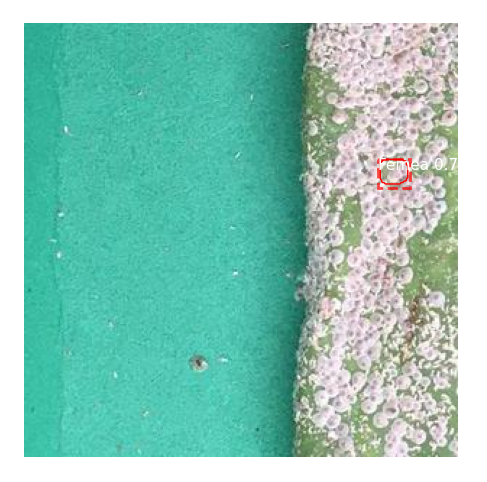

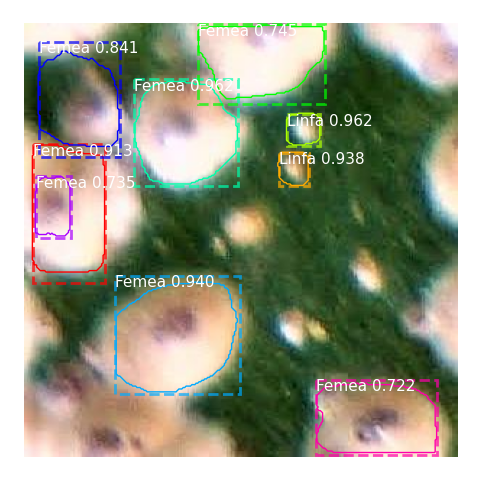

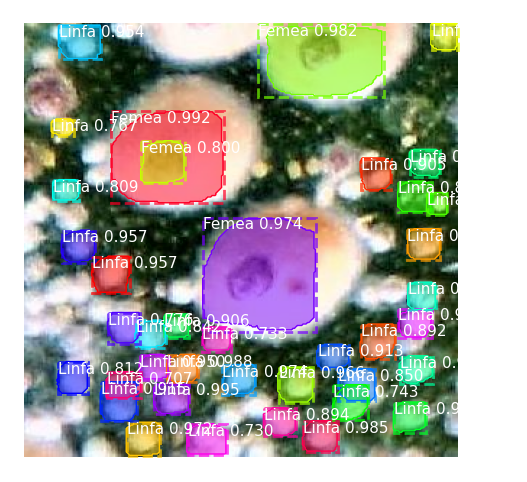

In [17]:
r = results[0]
r2 = results[1]
r3 = results[2]
print(f'objetos detectados imagem 1: { r["class_ids"] }, total: { len ( r["class_ids"] ) }')
print(f'objetos detectados imagem 2: { r2["class_ids"] }, total: { len ( r2["class_ids"] ) }')
print(f'objetos detectados imagem 3: { r3["class_ids"] }, total: { len ( r3["class_ids"] ) }')
visualize.display_instances(im1, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'],figsize=(6,6),show_mask=False)

visualize.display_instances(im2, r2['rois'], r2['masks'], r2['class_ids'], 
                            class_names, r2['scores'],figsize=(6,6),show_mask=False)

visualize.display_instances(im3, r3['rois'], r3['masks'], r3['class_ids'], 
                            class_names, r3['scores'],figsize=(6,6
                            ),show_mask=True)